In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup để hiển thị biểu đồ đẹp hơn
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Đọc dữ liệu đã tiền xử lý
df = pd.read_csv("../data/train_clean.csv")



In [27]:
print(df.shape)        # Kích thước
print(df.columns)      # Tên cột
print(df.dtypes)       # Kiểu dữ liệu
print(df.describe())   # Thống kê số liệu


(1460, 82)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

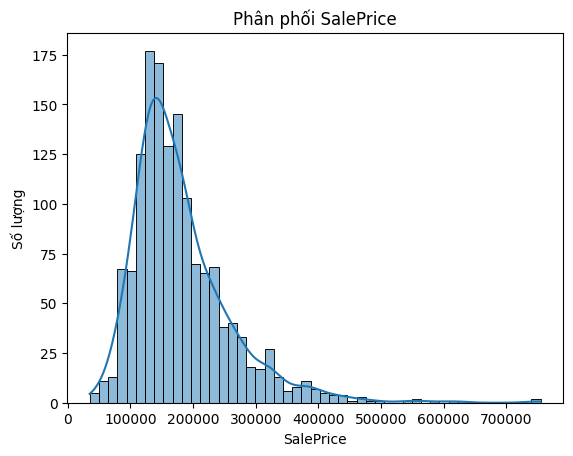

In [28]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Phân phối SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Số lượng")
plt.show()

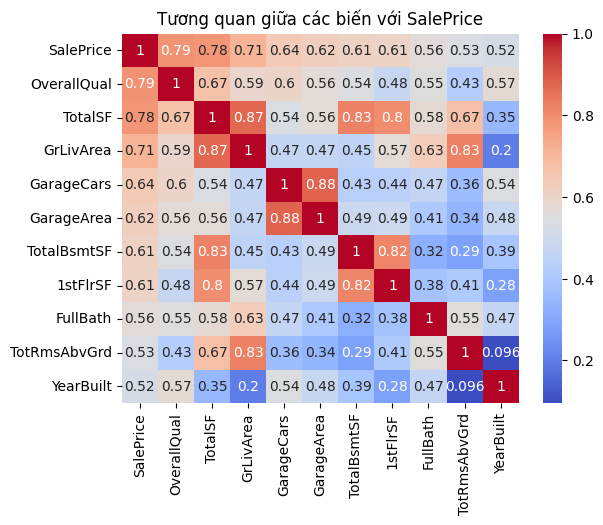

In [29]:
# Tính ma trận tương quan
corr = df.corr(numeric_only=True)

# Lấy top 10 biến có tương quan cao nhất với SalePrice
top_corr = corr["SalePrice"].abs().sort_values(ascending=False).head(11)
cols = top_corr.index.tolist()

# Vẽ heatmap
sns.heatmap(df[cols].corr(), annot=True, cmap='coolwarm')
plt.title("Tương quan giữa các biến với SalePrice")
plt.show()


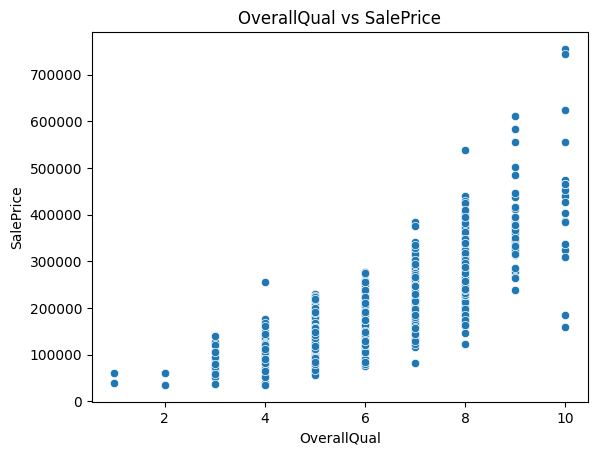

In [30]:
sns.scatterplot(x=df["OverallQual"], y=df["SalePrice"])
plt.title("OverallQual vs SalePrice")
plt.show()


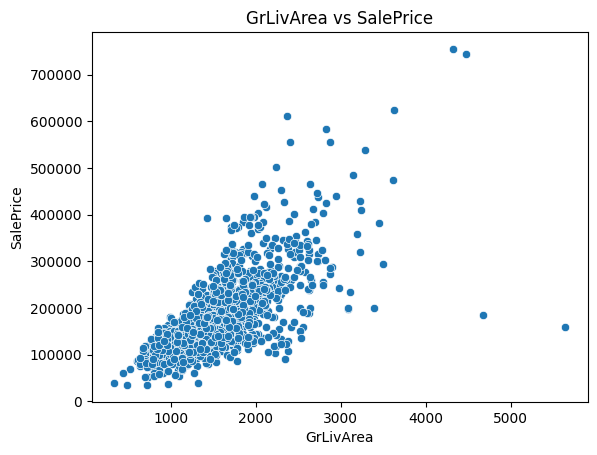

      GrLivArea  SalePrice
523        4676     184750
691        4316     755000
1182       4476     745000
1298       5642     160000


In [31]:
# Ví dụ: phát hiện giá trị GrLivArea quá lớn
sns.scatterplot(x="GrLivArea", y="SalePrice", data=df)
plt.title("GrLivArea vs SalePrice")
plt.show()

# Lọc ra những điểm có GrLivArea > 4000
outliers = df[df["GrLivArea"] > 4000]
print(outliers[["GrLivArea", "SalePrice"]])


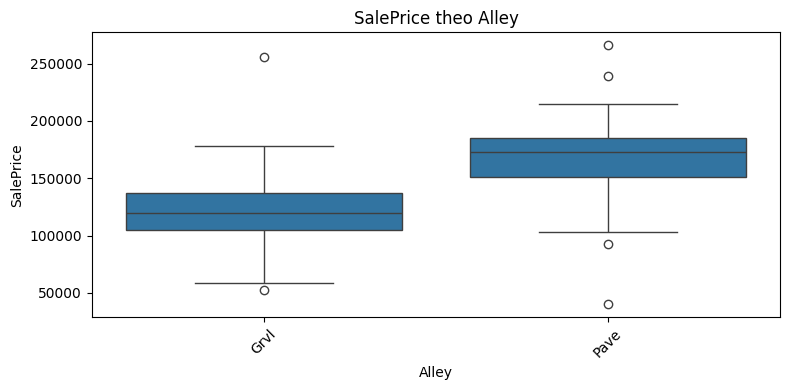

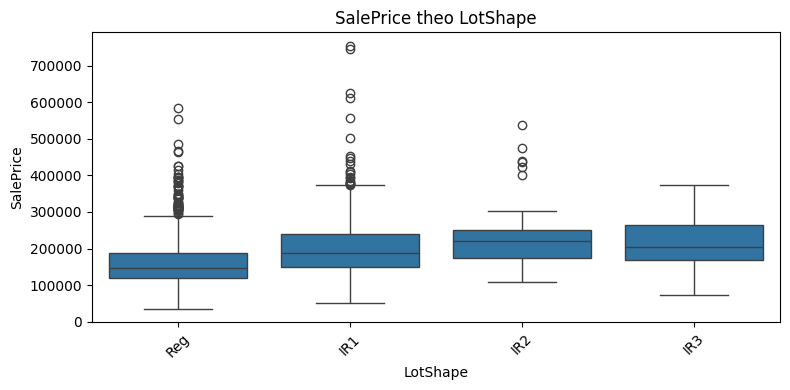

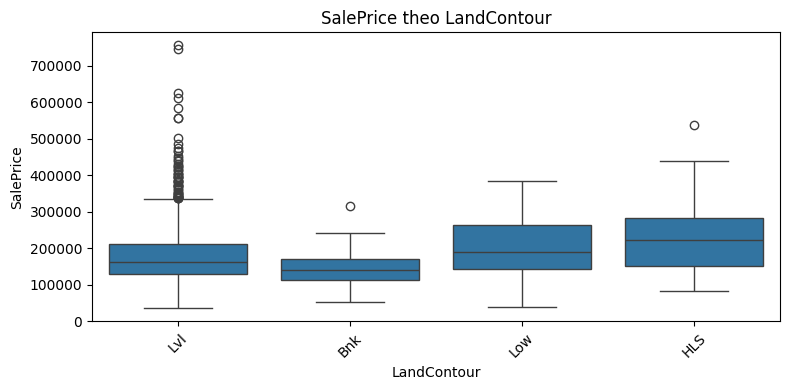

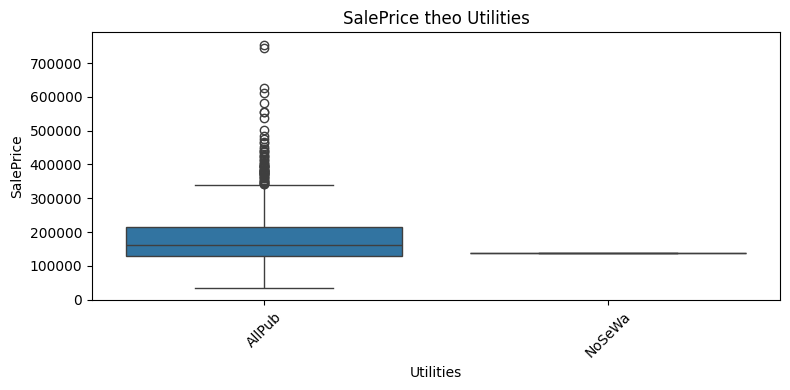

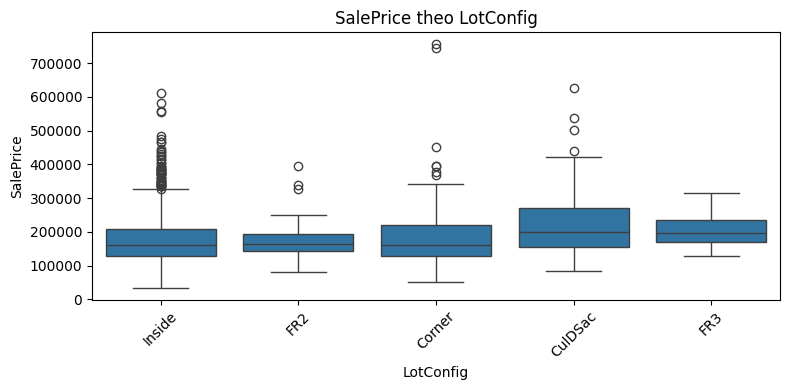

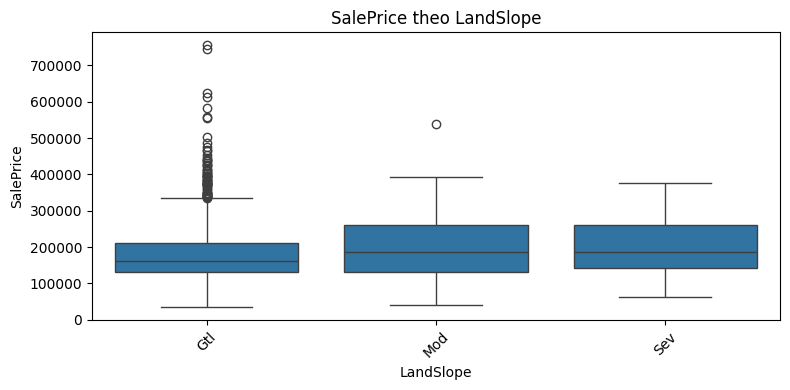

Bỏ qua Neighborhood (có 25 giá trị khác nhau)


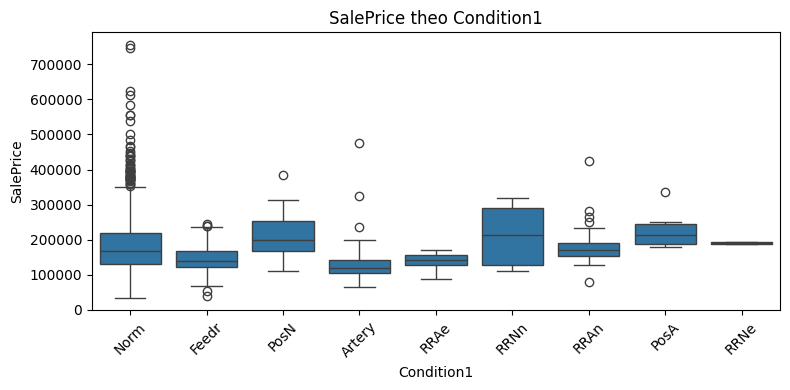

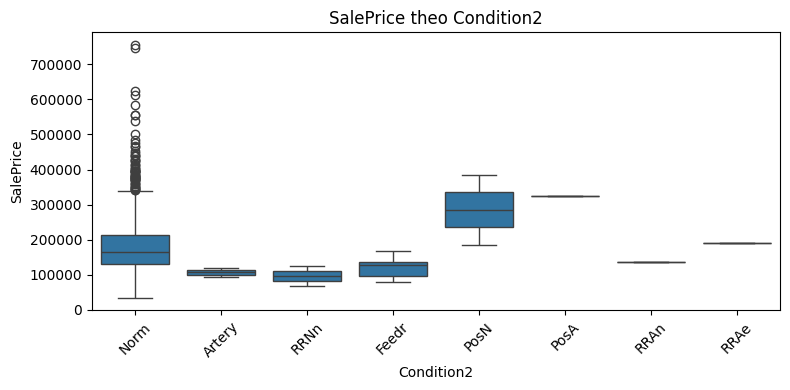

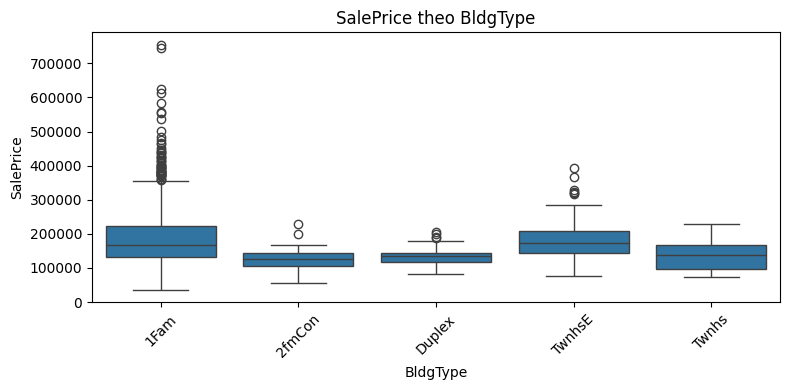

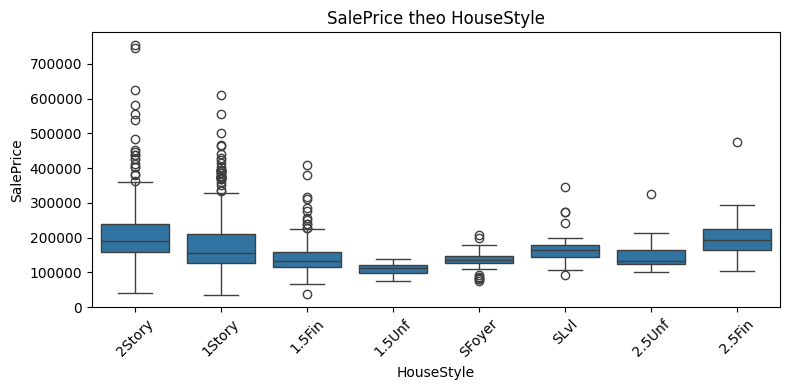

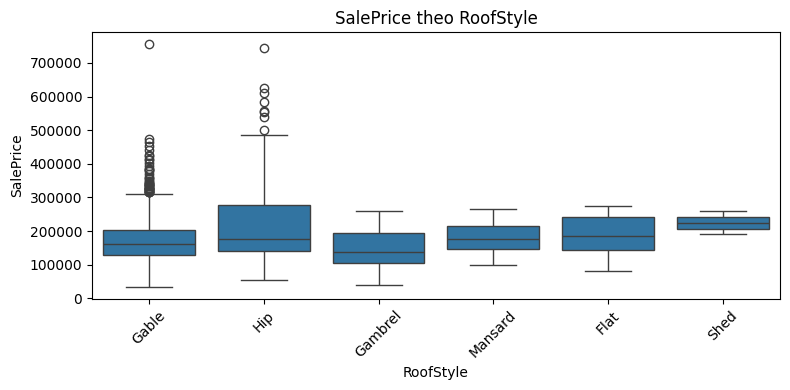

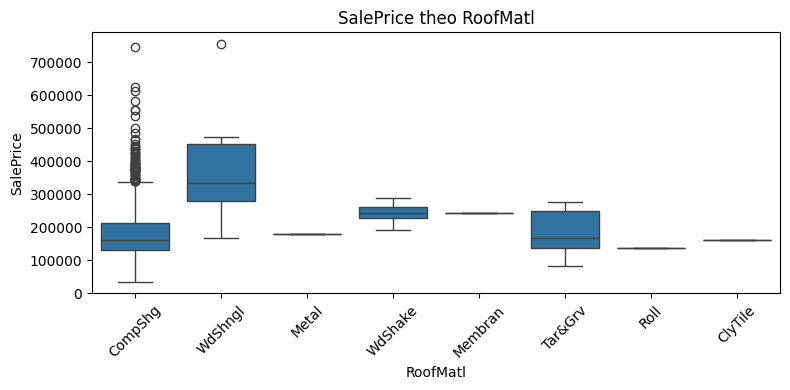

Bỏ qua Exterior1st (có 15 giá trị khác nhau)
Bỏ qua Exterior2nd (có 16 giá trị khác nhau)


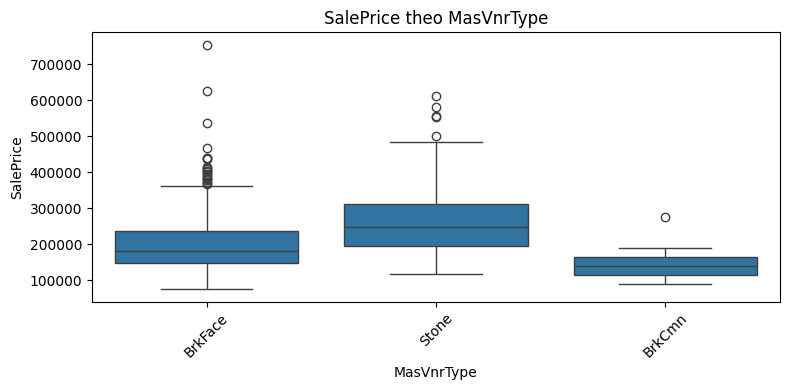

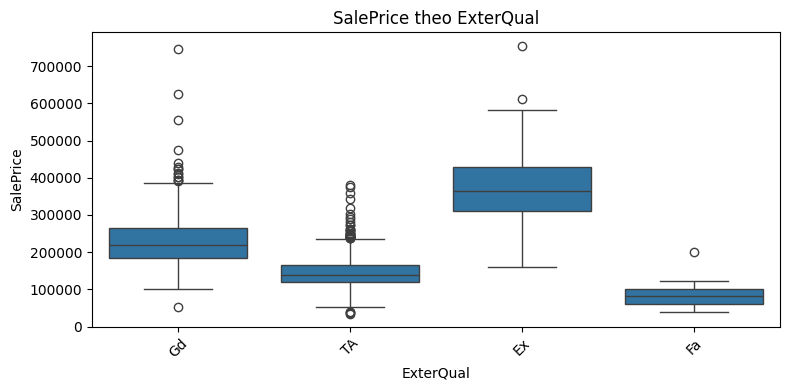

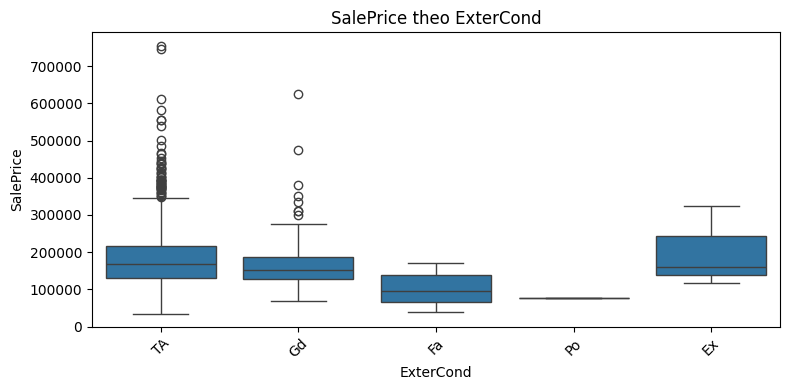

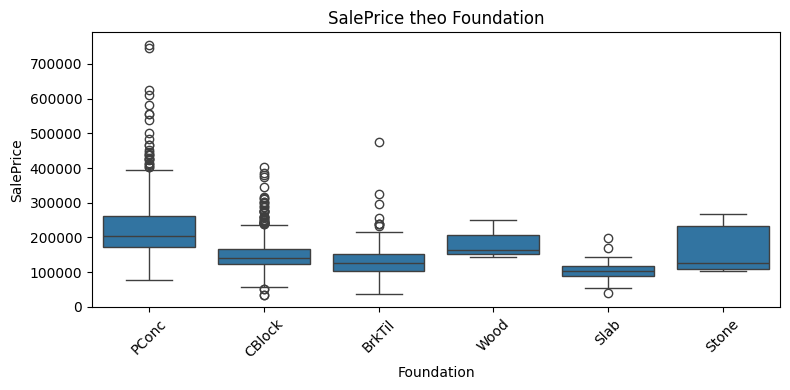

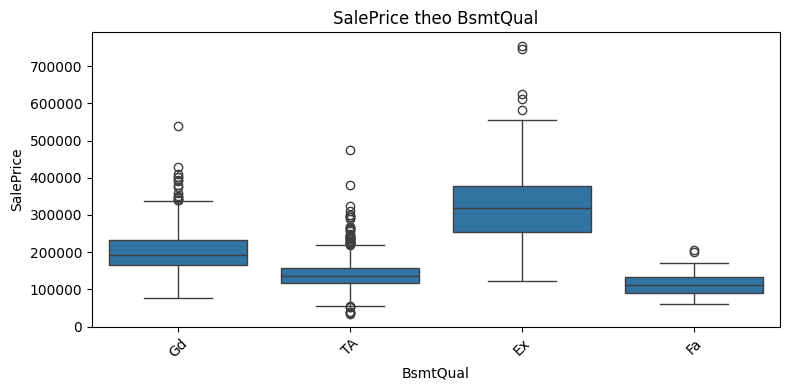

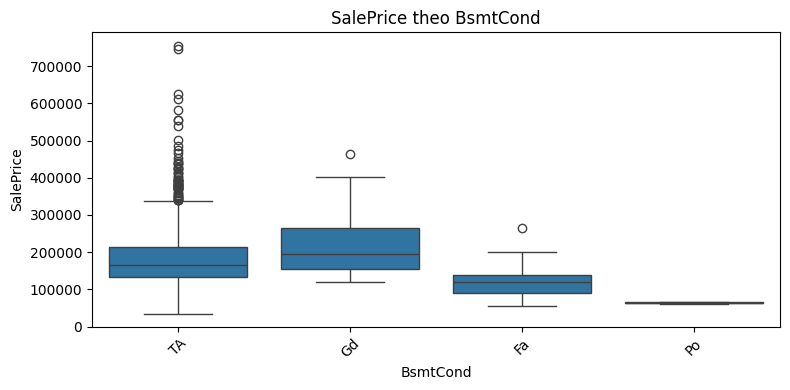

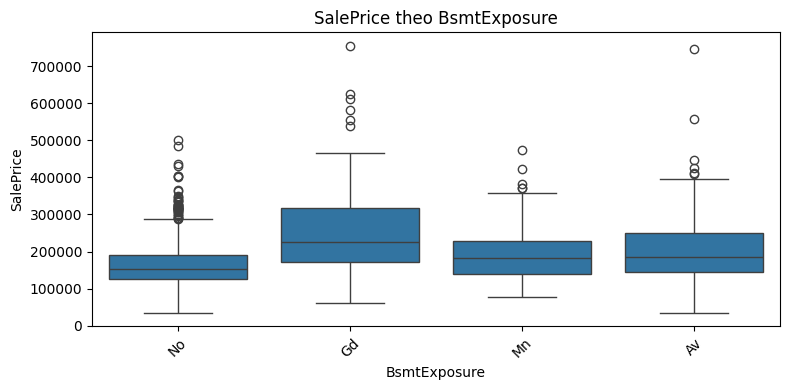

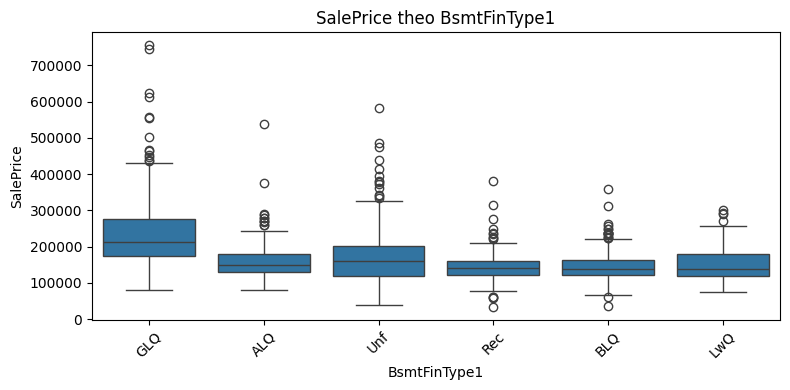

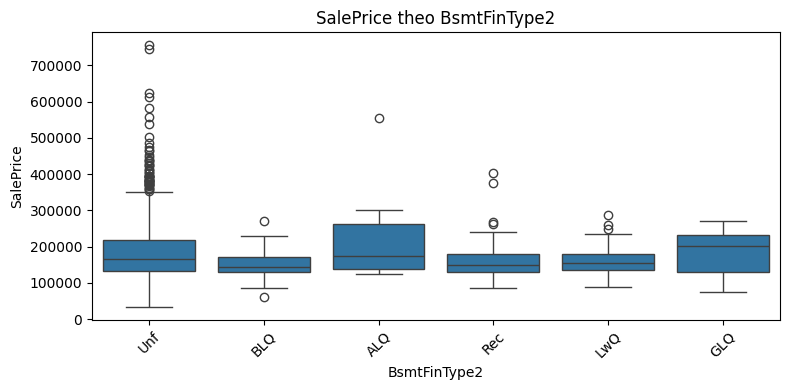

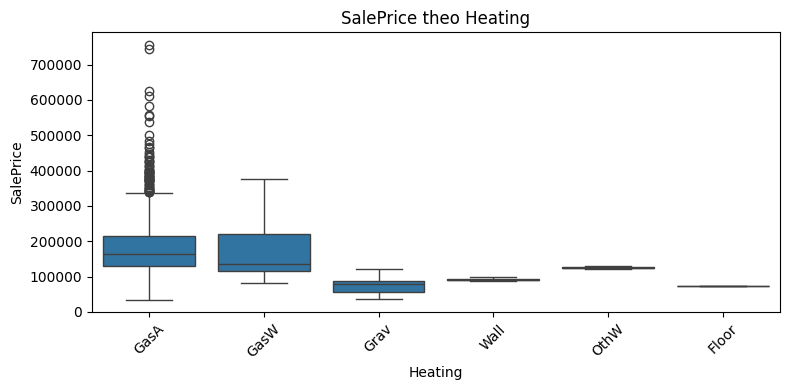

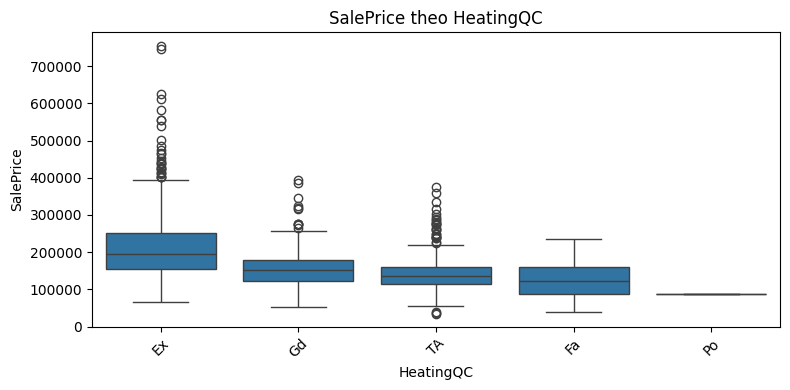

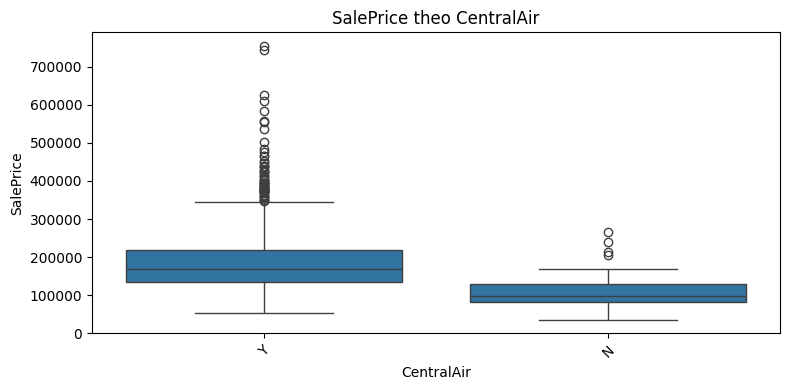

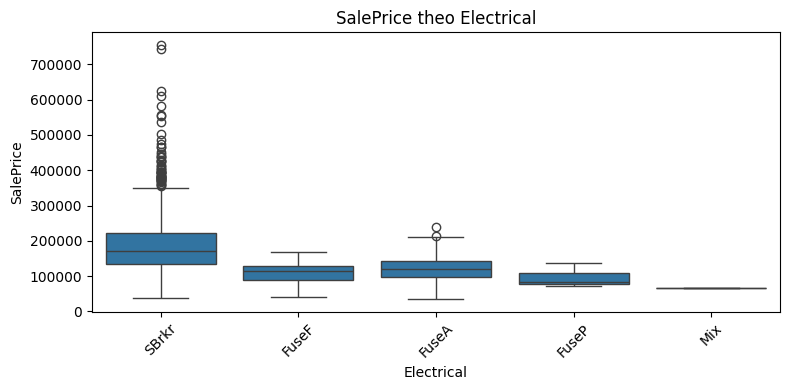

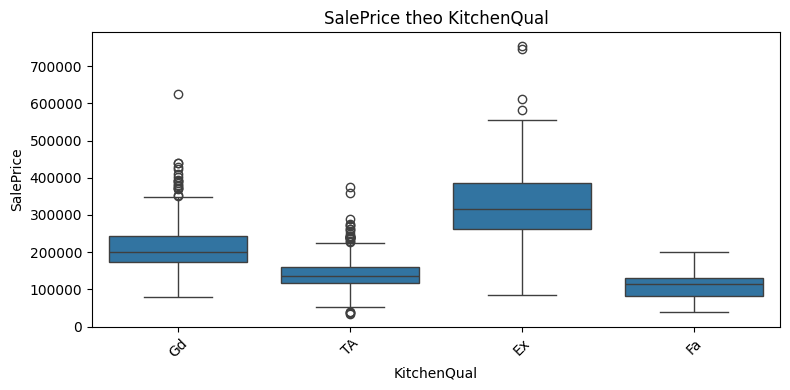

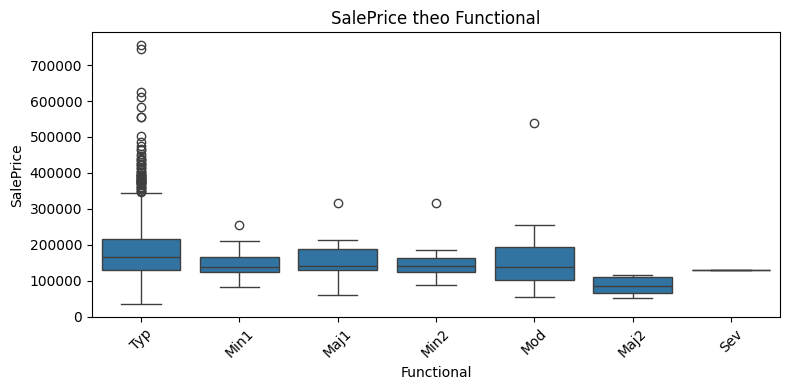

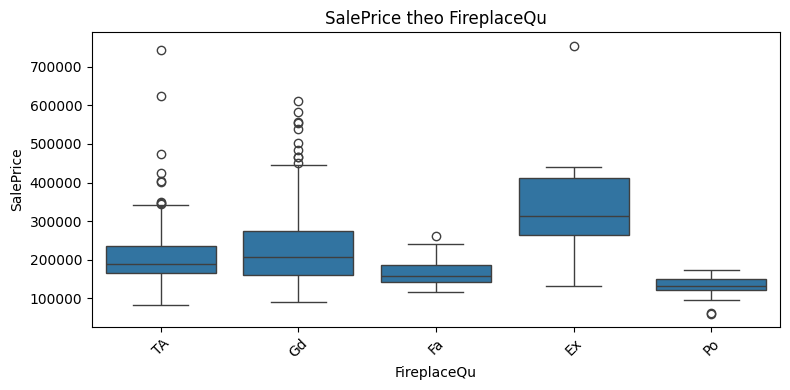

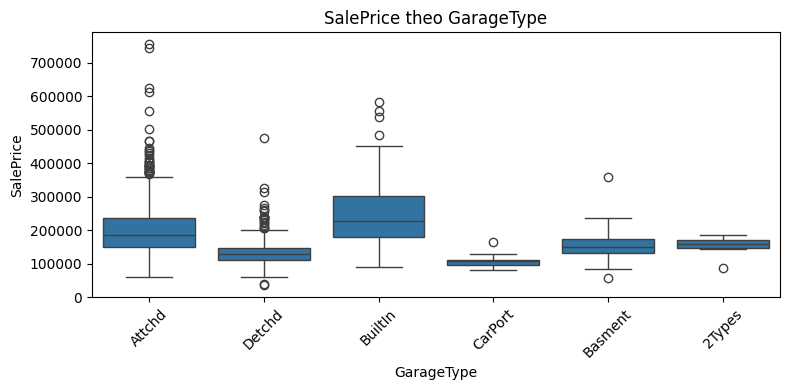

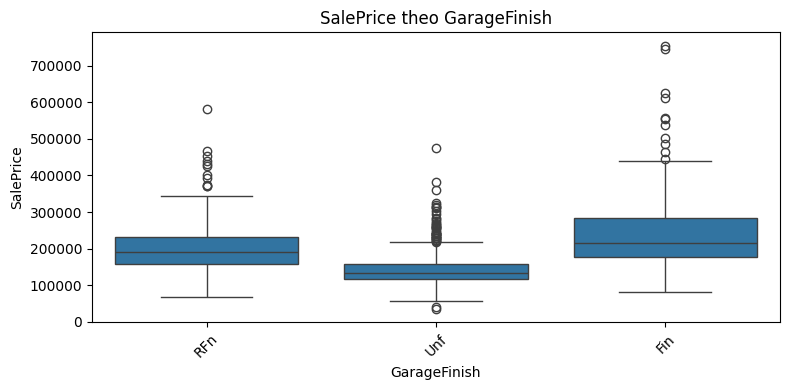

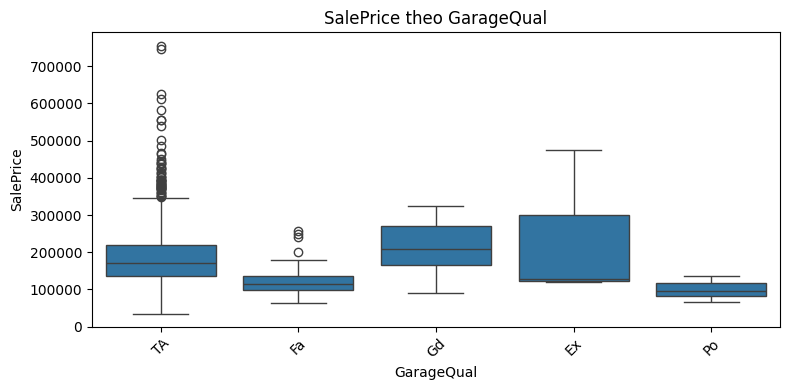

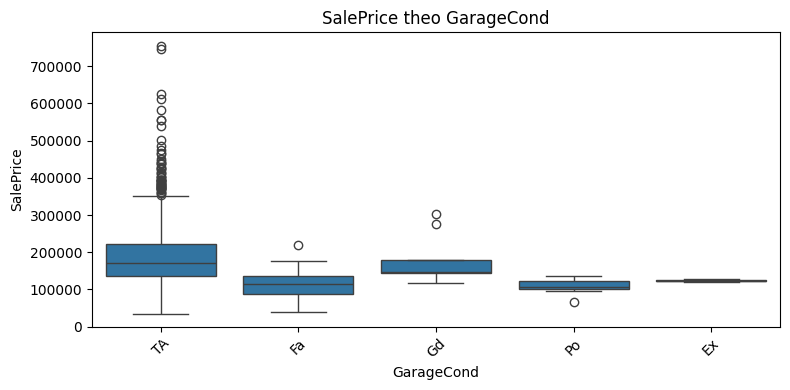

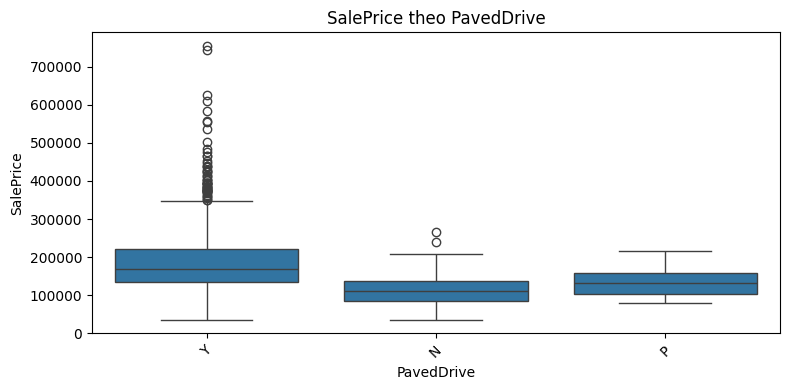

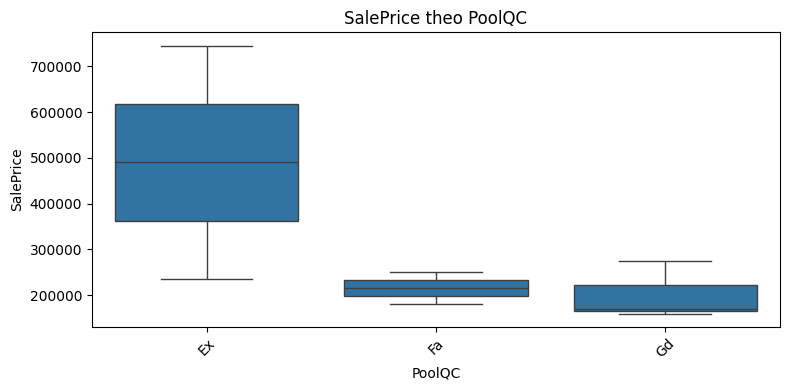

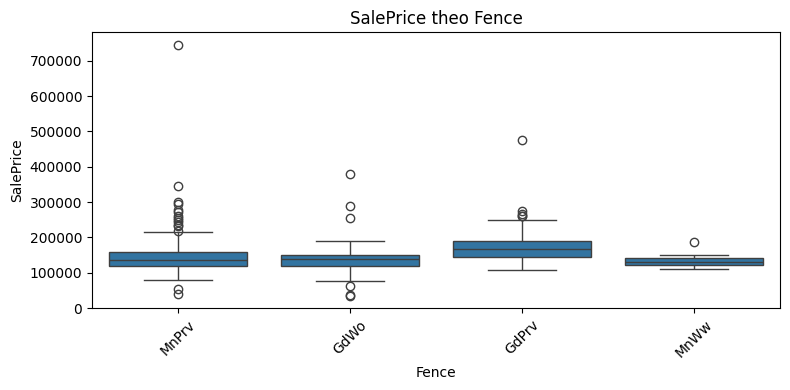

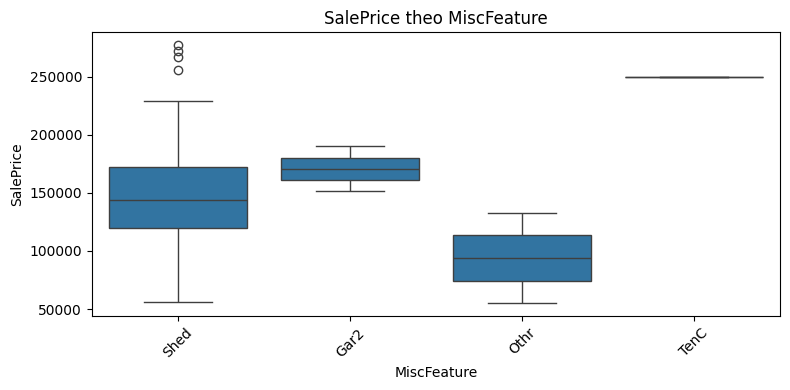

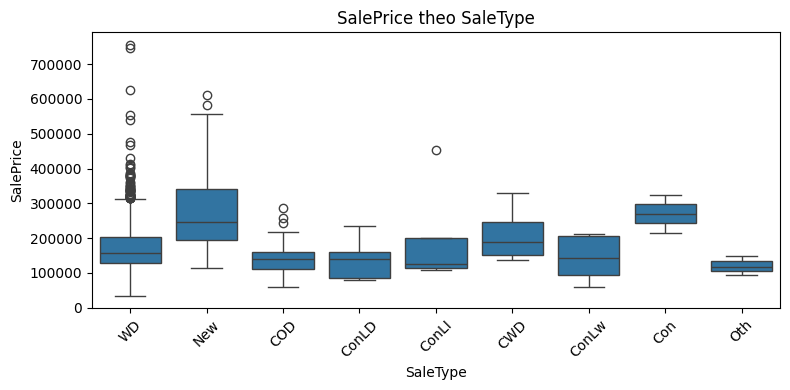

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical_vs_price(df, target="SalePrice", max_unique=10):
    categorical_cols = df.select_dtypes(include=["object"]).columns

    for col in categorical_cols:
        n_unique = df[col].nunique()
        if n_unique > max_unique:
            print(f"Bỏ qua {col} (có {n_unique} giá trị khác nhau)")
            continue
        
        plt.figure(figsize=(8, 4))
        sns.boxplot(x=col, y=target, data=df)
        plt.title(f"{target} theo {col}")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
plot_categorical_vs_price(df, target="SalePrice", max_unique=10)